# LHC Filling Pattern from CALS data

Info on the filling pattern for a fill
- decode filling scheme with various functions
- do some plots

Note : 
This script uses implicitly through the **cl2pd** call the CALS database through **pytimber**. A migration of **cl2pd** to NXCALS is ongoing, the example will be provided once completed but to a large extend will be transparent.  

In [ ]:
import LHCTools as ltools
from LHCTools import LHC_FillingPattern as FilPatt

# --- for local debugging
if 0 : 
    import sys
    sys.path.append('/eos/home-e/efthymio/Projects/LHCTools/LHCTools')
    from importlib import reload

    if 'fPattern' not in dir():
        import LHC_FillingPattern as fPattern
    else:
        reload(fPattern)

In [41]:
fPattern.version

'3.13 - May 8, 2020 (IE)'

In [3]:
import cl2pd
from cl2pd import importData
pd=importData.pd     #is the pandas package

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [4]:
fno = 7334

## LHC Filling Scheme info from LPC web

In [ ]:
ltools.my_cool_test_method()

In [42]:
lhcfpattern = fPattern.LHCFillingPattern(fno)
lhcfpattern.info()

>>>>> LHC Filling pattern for fil 7334
name ______________________________ 25ns_2556b_2544_2215_2332_144bpi_20injV3
bunch spacing _____________________ 25
bunches ___________________________ 2556
bunches at IP1/5 __________________ 2544
bunches at IP2 ____________________ 2215
bunches at IP8 ____________________ 2332
bunches per injection _____________ 144
no of injections __________________ 20


In [43]:
lhcfpattern.setBunchPatternAtMode('STABLE', pd.Timedelta('0s'))
filledBunchesDF = lhcfpattern.getBunchPatternAtMode()
filledBunchesDF.head()

,LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN,LHC.BCTFR.A6R4.B2:BUNCH_FILL_PATTERN,fill,mode,nobunches_b1,nobunches_b2,fpatt_b1,fpatt_b2,bid_b1,bid_b2
2018-10-23 14:36:56.848999977+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",7334,STABLE,2556.0,2556.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 6..."


In [44]:
bid_b1 = filledBunchesDF['bid_b1'].values[0]
bid_b2 = filledBunchesDF['bid_b2'].values[0]
print ('Filled slots @ SB : ',len(bid_b1),len(bid_b2))
print ('Beam 1 : ', bid_b1)
print ('Beam 2 : ', bid_b2)

Filled slots @ SB :  2556 2556
Beam 1 :  [  18   19   20 ... 3410 3411 3412]
Beam 2 :  [   6    7    8 ... 3410 3411 3412]


In [45]:
bpat_b1 = filledBunchesDF['fpatt_b1'].values[0]
bpat_b2 = filledBunchesDF['fpatt_b2'].values[0]
print (f'Filled slots @ SB : {np.sum(bpat_b1)} ,{np.sum(bpat_b2)}')
print (f'Beam 1 : {bpat_b1}')
print (f'Beam 2 : {bpat_b2}')

Filled slots @ SB : 2556.0 ,2556.0
Beam 1 : [0. 0. 0. ... 0. 0. 0.]
Beam 2 : [0. 0. 0. ... 0. 0. 0.]


## HeadOn Pattern
Head on pattern and colliding bunch pair info

In [46]:
headOnDF = lhcfpattern.getHeadOnPattern()
headOnDF.head()

,ho,hop,cflag,cflagp,beam,ip,cflagID,cflagIDp
0,61,61,291.0,295.0,B1,ip1,ip1-ip5-ip8,ip1-ip2-ip5-ip8
1,62,62,291.0,295.0,B1,ip1,ip1-ip5-ip8,ip1-ip2-ip5-ip8
2,63,63,291.0,291.0,B1,ip1,ip1-ip5-ip8,ip1-ip5-ip8
3,64,64,295.0,291.0,B1,ip1,ip1-ip2-ip5-ip8,ip1-ip5-ip8
4,65,65,295.0,291.0,B1,ip1,ip1-ip2-ip5-ip8,ip1-ip5-ip8


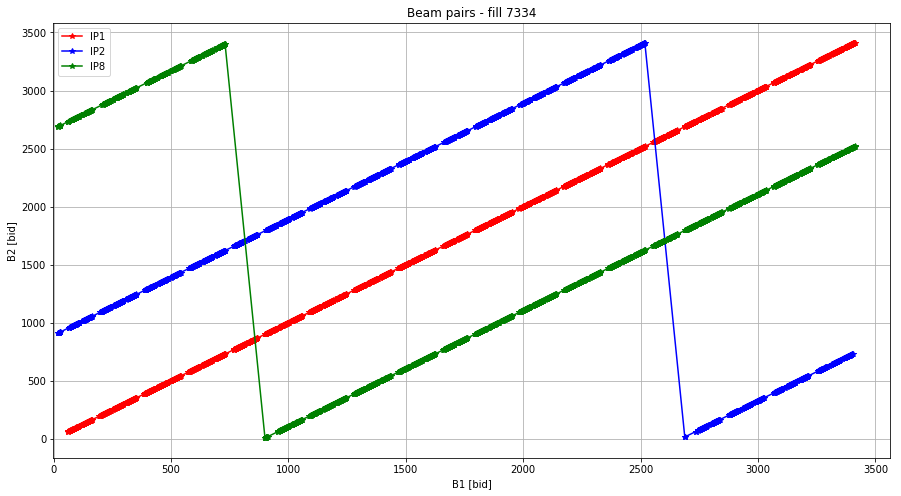

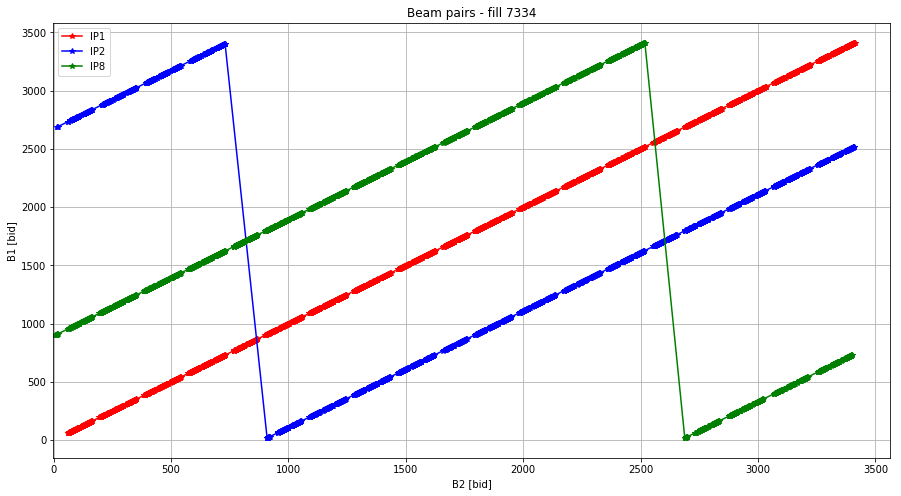

In [47]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
headOnDF[(headOnDF['beam']=='B1')&(headOnDF['ip']=='ip1')].plot(x='ho',y='hop', marker='*', color='red',label='IP1', ax=ax)
headOnDF[(headOnDF['beam']=='B1')&(headOnDF['ip']=='ip2')].plot(x='ho',y='hop', marker='*', color='blue',label='IP2', ax=ax)
headOnDF[(headOnDF['beam']=='B1')&(headOnDF['ip']=='ip8')].plot(x='ho',y='hop', marker='*', color='green',label='IP8', ax=ax)

plt.xlim([-1, 3564])
plt.grid()
plt.title(f'Beam pairs - fill {fno}')
plt.xlabel('B1 [bid]')
plt.ylabel('B2 [bid]')
plt.legend()


fig, ax = plt.subplots(1,1, figsize=(15,8))
headOnDF[(headOnDF['beam']=='B2')&(headOnDF['ip']=='ip1')].plot(x='ho',y='hop', marker='*', color='red',label='IP1', ax=ax)
headOnDF[(headOnDF['beam']=='B2')&(headOnDF['ip']=='ip2')].plot(x='ho',y='hop', marker='*', color='blue',label='IP2', ax=ax)
headOnDF[(headOnDF['beam']=='B2')&(headOnDF['ip']=='ip8')].plot(x='ho',y='hop', marker='*', color='green',label='IP8', ax=ax)

plt.xlim([-1, 3564])
plt.grid()

plt.title(f'Beam pairs - fill {fno}')
plt.xlabel('B2 [bid]')
plt.ylabel('B1 [bid]')
plt.legend()


In [48]:
b1cpatt, b2cpatt = fPattern.bcollPattern(bpat_b1, bpat_b2)

{'empty': 1008, 'ip1-ip5': 15, 'ip1-ip2-ip5': 209, 'ip2-ip8': 12, 'ip1-ip5-ip8': 326, 'ip1-ip2-ip5-ip8': 1994}
{'empty': 1008, 'ip1-ip5': 18, 'ip1-ip2-ip5': 206, 'ip8': 9, 'ip2-ip8': 3, 'ip1-ip5-ip8': 314, 'ip1-ip2-ip5-ip8': 2006}


Text(0.5,0.98,'Collision types fill 7334')

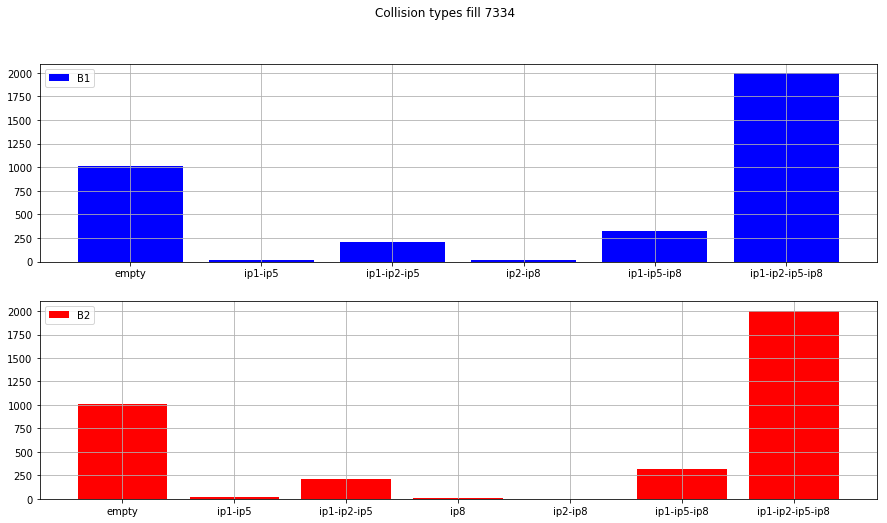

In [49]:
fig, ax = plt.subplots(2,1, figsize=(15,8))

flag, count = np.unique(b1cpatt, return_counts=True)
flag = flag.astype('int')
colpat = [cPairFlag_inv[k] if k in cPairFlag_inv.keys() else 'empty' for k in flag]
b1flags = dict(zip(colpat, count))
print (b1flags)
ax[0].bar(b1flags.keys(), b1flags.values(), color='blue', label='B1')
ax[0].grid()
ax[0].legend()

flag, count = np.unique(b2cpatt, return_counts=True)
flag = flag.astype('int')
colpat = [cPairFlag_inv[k] if k in cPairFlag_inv.keys() else 'empty' for k in flag]
b2flags = dict(zip(colpat, count))
print (b2flags)
ax[1].bar(b2flags.keys(), b2flags.values(), color='red', label='B2')
ax[1].grid()
ax[1].legend()

plt.suptitle(f'Collision types fill {fno}')

bins = [1, 3, 5, 7, 33, 35, 37, 39, 257, 259, 261, 263, 289, 291, 293, 295, 296]
locs = [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
labels = <a list of 16 Text xticklabel objects>
 data = [   0    0    0    0    0   15    0  209    0    0   12    0    0  326
    0 1994] [   0    0    0    0    0   18    0  206    9    0    3    0    0  314
    0 2006]


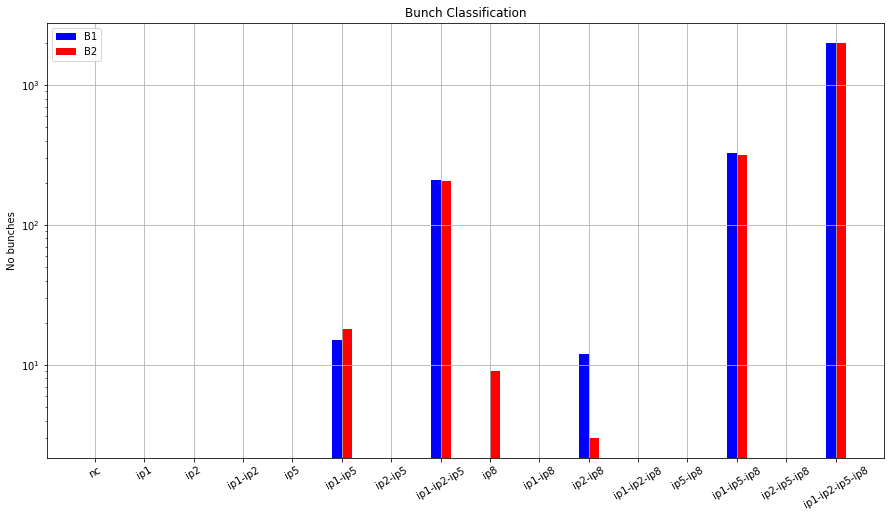

In [50]:

fig, ax = plt.subplots(1,1, figsize=(15,8))

# bins = []
# bins.append(0)
# bins = bins + list(cPairFlag.values())
bins = list(cPairFlag.values())
bins.append(bins[-1]+1)
labels = list(cPairFlag.keys())

histb1, xedges = np.histogram(b1cpatt, bins)
histb2, xedges = np.histogram(b2cpatt, bins)

plt.bar(np.arange(0.5-0.1,len(histb1)+0.5-0.1),histb1, color='blue', width=0.2, label='B1')
plt.bar(np.arange(0.5+0.11,len(histb1)+0.5+0.11),histb2, color='red', width=0.2, label='B2')

plt.xticks(np.arange(0.5,len(histb1)+0.5),labels,rotation=30)
locs,labels = plt.xticks()
plt.yscale('log')
plt.grid()
plt.legend()
plt.ylabel('No bunches')
plt.title('Bunch Classification')

print(f'bins = {bins}')
print(f'locs = {locs}')
print(f'labels = {labels}')
print(f' data = {histb1} {histb2}')

In [55]:
headOnDF[headOnDF['beam']=='B1'].groupby(['ip','cflagID','cflagIDp']).size()

ip   cflagID          cflagIDp       
ip1  ip1-ip2-ip5      ip1-ip2-ip5-ip8      42
                      ip1-ip5-ip8         167
     ip1-ip2-ip5-ip8  ip1-ip2-ip5          33
                      ip1-ip2-ip5-ip8    1848
                      ip1-ip5-ip8         113
     ip1-ip5          ip1-ip5-ip8          15
     ip1-ip5-ip8      ip1-ip2-ip5         173
                      ip1-ip2-ip5-ip8     116
                      ip1-ip5              18
                      ip1-ip5-ip8          19
ip2  ip1-ip2-ip5      ip1-ip2-ip5-ip8     209
     ip1-ip2-ip5-ip8  ip1-ip2-ip5         206
                      ip1-ip2-ip5-ip8    1785
                      ip2-ip8               3
     ip2-ip8          ip1-ip2-ip5-ip8      12
ip5  ip1-ip2-ip5      ip1-ip2-ip5-ip8      42
                      ip1-ip5-ip8         167
     ip1-ip2-ip5-ip8  ip1-ip2-ip5          33
                      ip1-ip2-ip5-ip8    1848
                      ip1-ip5-ip8         113
     ip1-ip5          ip1-ip5-ip8         

In [56]:
print ('>>> Bunch spacing:')
print (f''' \t B1 : \n in Bxing: {np.diff(bid_b1)} , \n in ns   : {np.diff(bid_b1)*25} [ns] ''')
print (f''' \t B2 : \n in Bxing: {np.diff(bid_b2)} , \n in ns   : {np.diff(bid_b2)*25} [ns] ''')

>>> Bunch spacing:
 	 B1 : 
 in Bxing: [1 1 1 ... 1 1 1] , 
 in ns   : [25 25 25 ... 25 25 25] [ns] 
 	 B2 : 
 in Bxing: [1 1 1 ... 1 1 1] , 
 in ns   : [25 25 25 ... 25 25 25] [ns] 


In [57]:
bunchTrainsDF = lhcfpattern.getBunchTrains()
bunchTrainsDF.head()

,id,bid_first,bid_last,bids,nbunches,gap,beam
0,0,18,29,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]",12,170,b1
1,1,61,108,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...",48,32,b1
2,2,116,163,"[116, 117, 118, 119, 120, 121, 122, 123, 124, ...",48,8,b1
3,3,195,242,"[195, 196, 197, 198, 199, 200, 201, 202, 203, ...",48,32,b1
4,4,250,297,"[250, 251, 252, 253, 254, 255, 256, 257, 258, ...",48,8,b1


## Get the long range encounters at all IPs

In [58]:
# -- TAN position: S_start = 140.25m, S_middle = 142.75m, S_end = 144.5m
HRF400 = 35640
LHCLENGTH  = 26658.8832
b_t_dist = 25
b_h_dist = LHCLENGTH/HRF400 * 10./2. * b_t_dist / 25.;
print (' Bunch spacing b_h_dist = ', b_h_dist, ' [m]')
S_TAN_end = 144.5
nmax = int(S_TAN_end/b_h_dist)
print (' Max No possible nominal LL encounters : ',nmax, '')

 Bunch spacing b_h_dist =  3.740022895622896  [m]
 Max No possible nominal LL encounters :  38 


In [59]:
lhcfpattern.setLongRangeEncounters(nmax)
lrencountersDF = lhcfpattern.getLongRangeEncounters()

In [60]:
lrencountersDF.head()

,bid,beam,hoip1,lrip1enc,lrip1enc_pos,lrip1enc_no,hoip2,lrip2enc,lrip2enc_pos,lrip2enc_no,hoip5,lrip5enc,lrip5enc_pos,lrip5enc_no,hoip8,lrip8enc,lrip8enc_pos,lrip8enc_no
0,18,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, ...",46,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -32, 1, 2, 3, 4, 5, ...",43
1,19,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -1, 1, 2, 3, 4, 5, 6...",43
2,20,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -2, -1, 1, 2, 3, 4, 5, 6,...",43
3,21,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -3, -2, -1, 1, 2, 3, 4, 5, 6, ...",43
4,22,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7...",43


## Do some plots

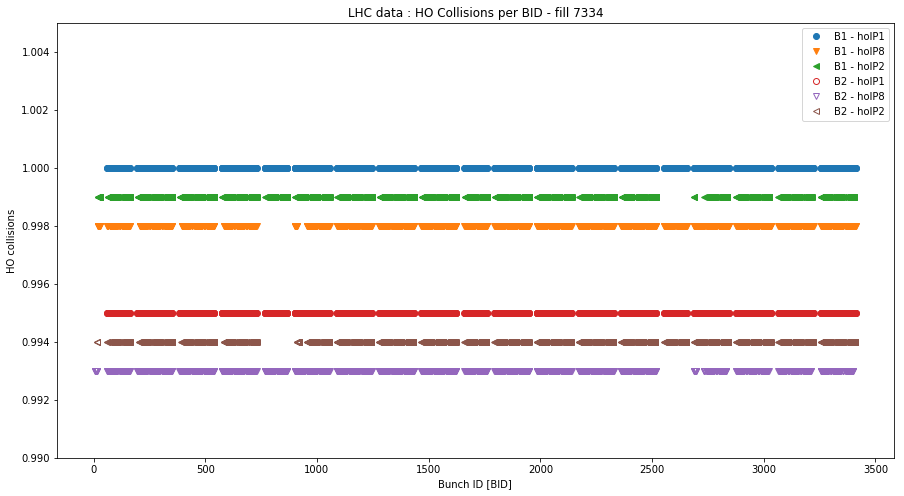

In [61]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
_tmp = lrencountersDF[lrencountersDF['beam']=='b1'][['bid','hoip1','hoip8','hoip2']].copy()
_tmp['hoip1s'] = _tmp['hoip1']*1.000
_tmp['hoip2s'] = _tmp['hoip2']*0.999
_tmp['hoip8s'] = _tmp['hoip8']*0.998
_tmp.plot(x='bid',y='hoip1s', label='B1 - hoIP1', marker='o', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip8s', label='B1 - hoIP8', marker='v', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip2s', label='B1 - hoIP2', marker='<', style='o', ax=ax)

_tmp = lrencountersDF[lrencountersDF['beam']=='b2'][['bid','hoip1','hoip8','hoip2']].copy()
_tmp['hoip1s'] = _tmp['hoip1']*0.995
_tmp['hoip2s'] = _tmp['hoip2']*0.994
_tmp['hoip8s'] = _tmp['hoip8']*0.993
_tmp.plot(x='bid',y='hoip1s', label='B2 - hoIP1', marker='o', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip8s', label='B2 - hoIP8', marker='v', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip2s', label='B2 - hoIP2', marker='<', fillstyle='none', style='o', ax=ax)

plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LHC data : HO Collisions per BID - fill {}'.format(fno))
plt.legend()

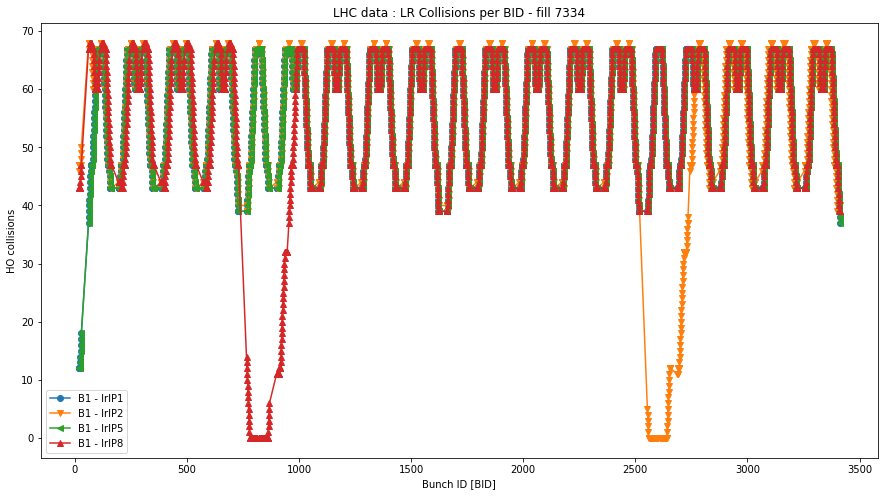

In [62]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip1enc_no', label='B1 - lrIP1', marker='o', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip2enc_no', label='B1 - lrIP2', marker='v', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip5enc_no', label='B1 - lrIP5', marker='<', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip8enc_no', label='B1 - lrIP8', marker='^', style='-', ax=ax)

# plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LHC data : LR Collisions per BID - fill {}'.format(fno))
plt.legend()

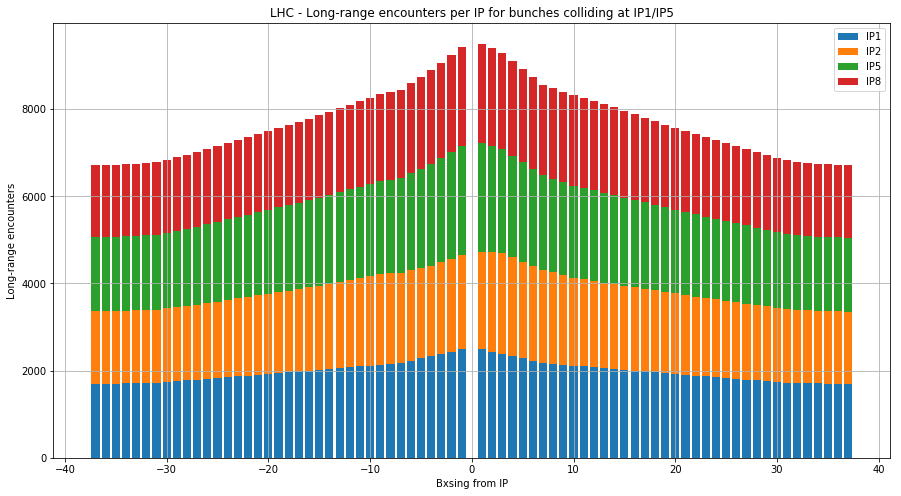

In [63]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
dflist = {}
dflist['ipslot'] = np.concatenate(((np.arange(1,nmax)*-1)[::-1], np.arange(1,nmax)))
for ip in ['ip1', 'ip2', 'ip5', 'ip8']:
    lrs = lrencountersDF[(lrencountersDF['beam']=='b1') & (lrencountersDF['hoip1']==1)]['lr'+ip+'enc'].values
    lrtot = sum(lrs)
    dflist['lr'+ip] = lrtot
width = 0.8
p1 = plt.bar(dflist['ipslot'], dflist['lrip1'], width,)
p2 = plt.bar(dflist['ipslot'], dflist['lrip2'], width, bottom=dflist['lrip1'])
p3 = plt.bar(dflist['ipslot'], dflist['lrip5'], width, bottom=dflist['lrip1']+dflist['lrip2'])
p4 = plt.bar(dflist['ipslot'], dflist['lrip8'], width, bottom=dflist['lrip1']+dflist['lrip2']+dflist['lrip5'])

plt.ylabel('Long-range encounters')
plt.xlabel('Bxsing from IP')
plt.title('LHC - Long-range encounters per IP for bunches colliding at IP1/IP5'.format(fno))
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('IP1', 'IP2','IP5','IP8'))
plt.grid()
plt.show()

In [64]:
lrencountersDF

,bid,beam,hoip1,lrip1enc,lrip1enc_pos,lrip1enc_no,hoip2,lrip2enc,lrip2enc_pos,lrip2enc_no,hoip5,lrip5enc,lrip5enc_pos,lrip5enc_no,hoip8,lrip8enc,lrip8enc_pos,lrip8enc_no
0,18,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, ...",46,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -32, 1, 2, 3, 4, 5, ...",43
1,19,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -1, 1, 2, 3, 4, 5, 6...",43
2,20,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -2, -1, 1, 2, 3, 4, 5, 6,...",43
3,21,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -3, -2, -1, 1, 2, 3, 4, 5, 6, ...",43
4,22,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7...",43
5,23,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17, -16, -15, -14, -13, -12, -11, -10, -9, -...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17, -16, -15, -14, -13, -12, -11, -10, -9, -...",12,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7,...",43
6,24,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-18, -17, -16, -15, -14, -13, -12, -11, -10, ...",13,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-18, -17, -16, -15, -14, -13, -12, -11, -10, ...",13,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, ...",43
7,25,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-19, -18, -17, -16, -15, -14, -13, -12, -11, ...",14,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-19, -18, -17, -16, -15, -14, -13, -12, -11, ...",14,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6,...",44
8,26,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-20, -19, -18, -17, -16, -15, -14, -13, -12, ...",15,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17, -16, -15, -14, -13, -12, -11, -10, -9, -...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...